In [1]:
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
import numpy as np
import pandas as pd


In [3]:
x = ['which book is this', 'this is book and this is math']

In [4]:
cv = CountVectorizer()
count = cv.fit_transform(x)

In [5]:
count.toarray()#bow


array([[0, 1, 1, 0, 1, 1],
       [1, 1, 2, 1, 2, 0]])

In [6]:
import warnings
warnings.filterwarnings("ignore")


In [7]:
cv.get_feature_names()

['and', 'book', 'is', 'math', 'this', 'which']

In [8]:
bow = pd.DataFrame(count.toarray(), columns=cv.get_feature_names())

In [9]:
bow

,and,book,is,math,this,which
0,0,1,1,0,1,1
1,1,1,2,1,2,0


In [10]:
bow.shape

(2, 6)

In [11]:
tf =bow.copy()
for index,row in enumerate(tf.iterrows()):
    for col in row[1].index:
        tf.loc[index,col] = tf.loc[index,col]/sum(row[1].values)

In [12]:
for index,row in enumerate(tf.iterrows()):
    print(row[1])
    print()

and      0.00
book     0.25
is       0.25
math     0.00
this     0.25
which    0.25
Name: 0, dtype: float64

and      0.142857
book     0.142857
is       0.285714
math     0.142857
this     0.285714
which    0.000000
Name: 1, dtype: float64



In [13]:
tf

,and,book,is,math,this,which
0,0.000000,0.250000,0.250000,0.000000,0.250000,0.25
1,0.142857,0.142857,0.285714,0.142857,0.285714,0.00


In [14]:
bow

,and,book,is,math,this,which
0,0,1,1,0,1,1
1,1,1,2,1,2,0


In [15]:
bb = bow.astype('bool')

In [16]:
bb

,and,book,is,math,this,which
0,False,True,True,False,True,True
1,True,True,True,True,True,False


In [17]:
bb['is'].sum()

2

In [18]:
cols = bb.columns

In [19]:
nz =[]
for col in cols:
    nz.append(bb[col].sum())
nz

[1, 2, 2, 1, 2, 1]

In [20]:
N = 2
idf = []
for index,col in enumerate(cols):
    idf.append(np.log((N + 1)/(nz[index] + 1)) + 1)
idf

[1.4054651081081644, 1.0, 1.0, 1.4054651081081644, 1.0, 1.4054651081081644]

In [21]:
# tfidf

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
x

['which book is this', 'this is book and this is math']

In [24]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(x)

In [25]:
print(X.toarray())

[[0.         0.44832087 0.44832087 0.         0.44832087 0.63009934]
 [0.39054766 0.27787788 0.55575576 0.39054766 0.55575576 0.        ]]


In [26]:
print(tfidf.idf_)

[1.40546511 1.         1.         1.40546511 1.         1.40546511]


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
df = pd.read_csv('/Users/gowthammarrapu/Documents/untitled folder 2/nlp-for-beginners-udemy/14-Spam Text Classification/spam.tsv', sep = '\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [29]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [30]:
df.shape

(5572, 4)

In [31]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [32]:
#imbalced dataset to balanced dataset

In [33]:
ham = df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [34]:
spam = df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [35]:
ham.shape,spam.shape

((4825, 4), (747, 4))

In [36]:
ham = ham.sample(spam.shape[0])
ham

,label,message,length,punct
4660,ham,I cant pick the phone right now. Pls send a me...,51,1
2384,ham,Your pussy is perfect!,22,1
2751,ham,Ok but tell me half an hr b4 u come i need 2 p...,53,1
3599,ham,"Aight, we'll head out in a few",30,2
3542,ham,If you are not coughing then its nothing,40,0
...,...,...,...,...
2401,ham,Hi! This is Roger from CL. How are you?,39,3
3661,ham,I will reach ur home in &lt;#&gt; minutes,43,5
5267,ham,Anything lar then ü not going home 4 dinner?,44,1
4905,ham,"no, i *didn't* mean to post it. I wrote it, an...",415,28


In [37]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [38]:
data = ham.append(spam,ignore_index=True)

In [39]:
data.sample(5)

,label,message,length,punct
864,spam,Last Chance! Claim ur £150 worth of discount v...,152,9
236,ham,"We are at grandmas. Oh dear, u still ill? I fe...",135,6
773,spam,Customer service annoncement. You have a New Y...,124,2
1221,spam,URGENT! We are trying to contact U Todays draw...,156,4
932,spam,You are a winner U have been specially selecte...,145,3


In [40]:
data.shape



(1494, 4)

In [41]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

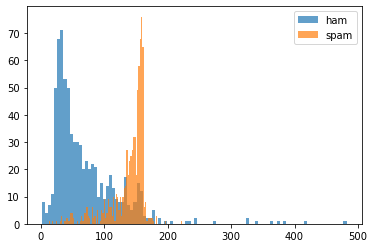

In [42]:
plt.hist(ham['length'],bins =100,alpha=0.7,label='ham')
plt.hist(spam['length'],bins =100,alpha=0.7,label='spam')
plt.legend()
plt.show()

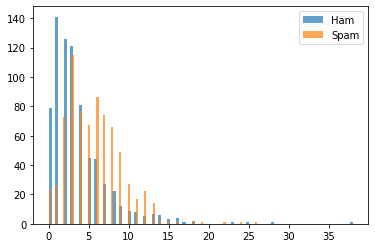

In [43]:
plt.hist(ham['punct'], bins = 100, alpha = 0.7, label='Ham')
plt.hist(spam['punct'], bins = 100, alpha = 0.7, label = 'Spam')
plt.legend()
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
data

,label,message,length,punct
0,ham,I cant pick the phone right now. Pls send a me...,51,1
1,ham,Your pussy is perfect!,22,1
2,ham,Ok but tell me half an hr b4 u come i need 2 p...,53,1
3,ham,"Aight, we'll head out in a few",30,2
4,ham,If you are not coughing then its nothing,40,0
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [47]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data['message'])

In [48]:
X = X.toarray()

In [49]:
X.shape

(1494, 4493)

In [50]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size = 0.2, random_state = 0, stratify = data['label'])

In [52]:
X_train.shape,X_test.shape

((1195, 4493), (299, 4493))

In [53]:
clf = RandomForestClassifier(n_estimators=100, n_jobs= -1)

In [54]:
clf.fit(X_train,y_train)


RandomForestClassifier(n_jobs=-1)

In [55]:
y_pred = clf.predict(X_test)

In [56]:
confusion_matrix(y_test,y_pred)

array([[149,   1],
       [ 15, 134]])

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.99      0.95       150
        spam       0.99      0.90      0.94       149

    accuracy                           0.95       299
   macro avg       0.95      0.95      0.95       299
weighted avg       0.95      0.95      0.95       299



In [58]:
### svm

In [59]:
clf = SVC(C = 1000,gamma='auto')

In [60]:
clf.fit(X_train,y_train)


SVC(C=1000, gamma='auto')

In [61]:
y_pred = clf.predict(X_test)

In [62]:
confusion_matrix(y_test,y_pred)

array([[148,   2],
       [ 17, 132]])

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.90      0.99      0.94       150
        spam       0.99      0.89      0.93       149

    accuracy                           0.94       299
   macro avg       0.94      0.94      0.94       299
weighted avg       0.94      0.94      0.94       299



In [64]:
clf

SVC(C=1000, gamma='auto')

In [65]:
def predict(x):
    x = tfidf.transform([x])
    x = x.toarray()
    pred = clf.predict(x)
    return pred
  

In [66]:
predict('hey, whassup')

array(['ham'], dtype=object)

In [67]:
predict('you got an exicting offer are ypu willing to pay some bucks')

array(['ham'], dtype=object)

In [68]:
predict('you have got free tickets to the usa this summer')

array(['spam'], dtype=object)

In [69]:
predict('everything is free ')

array(['ham'], dtype=object)

In [70]:
predict('final call')

array(['spam'], dtype=object)